In [1]:
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import haddock_ssnmf
from haddock_ssnmf import Haddock_SSNMF

import display_ssnmf
from display_ssnmf import *


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 3331
Dropping 99
(878, 31)
Index(['recall a tick bite', 'length of time noticed tick bite',
       'treated with antibiotics', 'length of time treated for tick bite',
       'period of time for diagnosis', 'misdiagnosis', 'tick born coinfection',
       'Babesia', 'Bartonella', 'Ehrlichia/ Anaplasma', 'Mycoplasma',
       'Rickettsia', 'Bio Sex', 'Antibiotics', 'Times Infected', 'GROC',
       'Bed Days', 'Mental Health Days', 'Physical Health Days', 'Disability',
       'general practitioner', 'infectious disease specialist', 'internist',
       'lyme specialist', 'other doctor', 'pediatrician', 'rheumatologist',
       'neither', 'neuro', 'musculo', 'both'],
      dtype='object')
CNS1 Working Definition: Neuro vs Musculo vs Both vs Neither
best accuracy:  0.48284701114488354  best params:  {'k': 25, 'lambda': 0.0, 'random_state': 5}
test_accuracy:  (0.4318181818181818, 4.4543530211434)


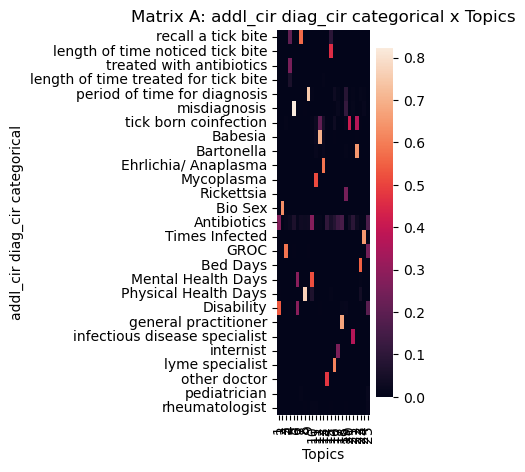

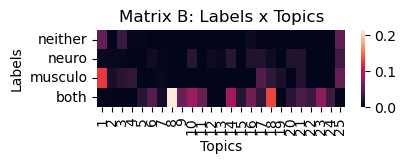

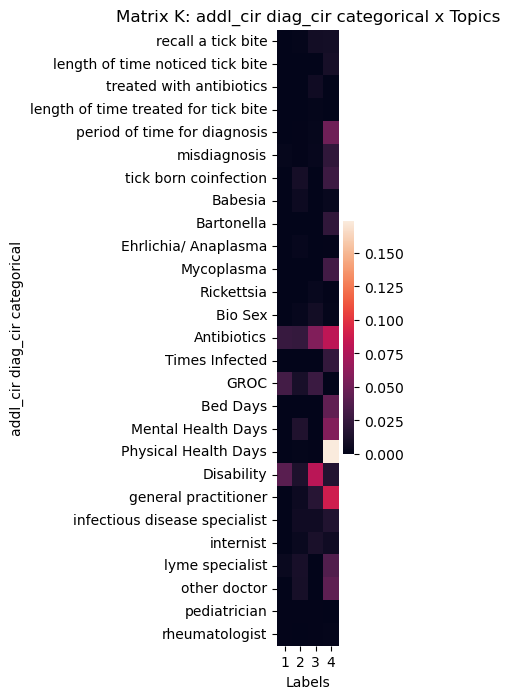

In [2]:
# CNS1 Defn
data = LymeData({CHRONIC, NEURO, MUSCULO},{ADDL_CIR, DIAG_CIR, CATG},{NEURO, MUSCULO, BOTH, NEITHER}, defn=DEF_CNS1, drop_99=True)
print(data.df.shape)
print(data.df.columns)

data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params, accu_distr, Xreconerr_distr, Yreconerr_distr, Xtestreconerr_distr = ssnmf.gridsearch(param_range={'k': range(24,35),'lambda': list(np.linspace(0,1,10)), 'random_state': range(0,10)},
                                             get_topic_accu_distr=True, get_reconerr_distr=True)
print('CNS1 Working Definition: Neuro vs Musculo vs Both vs Neither')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

names = ADDL_CIR + " "+ DIAG_CIR + " " + CATG
labels = [x for x in data.df.columns if x not in [NEURO, MUSCULO, BOTH, NEITHER]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)

# Total Neuro: 2569
# Total Non-Neuro: 1394

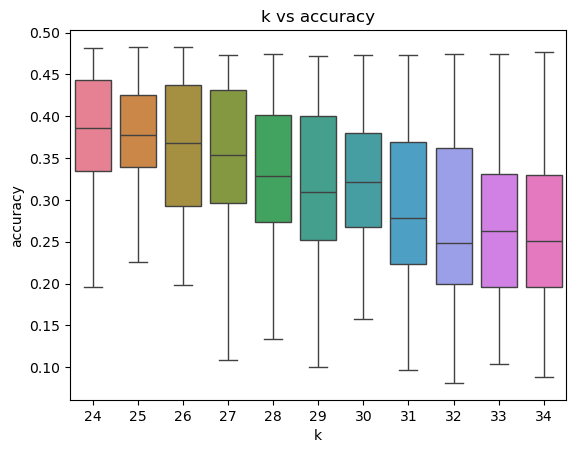

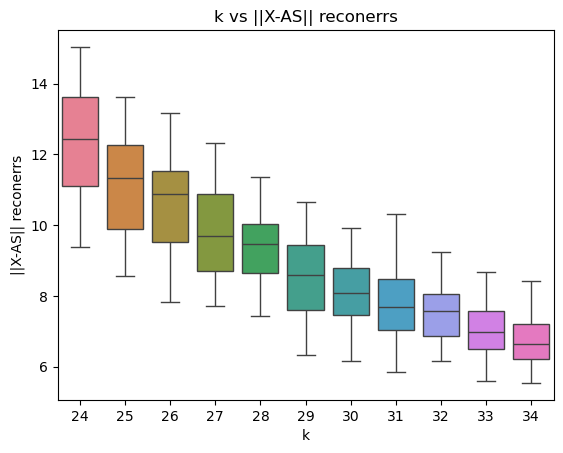

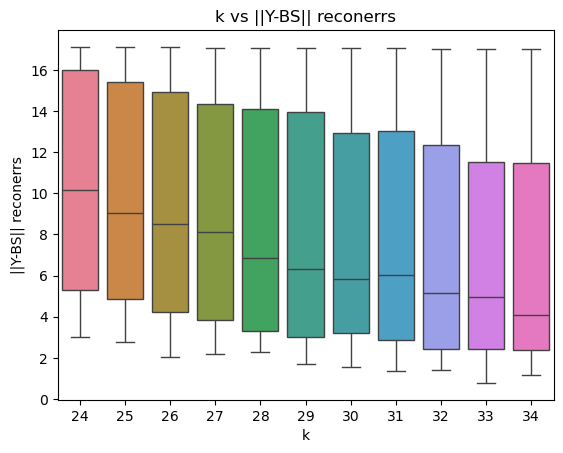

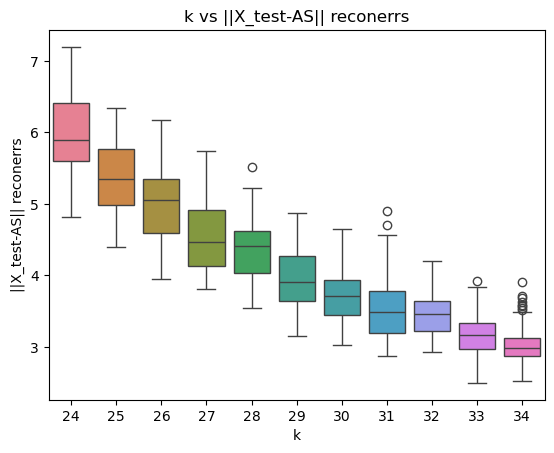

In [3]:
display_distr(accu_distr)
display_distr(Xreconerr_distr, ylabel='||X-AS|| reconerrs')
display_distr(Yreconerr_distr, ylabel='||Y-BS|| reconerrs')
display_distr(Xtestreconerr_distr, ylabel='||X_test-AS|| reconerrs')